Overview Exercises:
"Has the network latency gone up since we switched internet service providers?"
H0: There is not an increase in network latency between our new ISP and our old ISP. 
H1: There is an increase in network latency for our new ISP compared to our old ISP.
True pos: There is a difference in network latency and our new ISP has more latency.
True neg: There is no difference in network latency and our new ISP and old ISP have similar results.
Type I error: We declare that there is a difference in network latency since using a new ISP but in actuality there is not. Maybe this is a temporary issue or our p-value was not properly assessed. 
Type II error: We declare there is not an increaes in network latency but there actually is. Perhaps this is due to inaccurate or incomplete capture of data, that doesn't span enough time or conditions to test true network latency.

"Is the website redesign any good?"
H0: There is not a change in traffic to our website since the redesign.
H1: There is a change in traffic to our website since the redesign.
True pos: There is an increase in traffic to the website since the redesign.
True neg: There is not an increase in traffic to the website since the redesign.
Type I error: We declare that there is a difference in traffic since the redesign, but this is not true. Perhaps we did not account for a long enough period of time or the increase in traffic was a result of a different factor/campaign.
Type II error: We declare there is not an increase in traffic when there was, perhaps we did not account for an entire type of traffice, such as mobile traffic. 

"Is our television ad driving more sales?"
H0: There is no difference in sales from before and after our TV ad.
H1: There is a difference in sales from before and after our TV ad.
True pos: There is a difference in sales from before and after our TV ad.
True neg: There is no difference in sales from before and after our TV ad.
Type I error: We declare that there is a difference in sales from our TV ad, but we did not properly attribute what the true factor was. Perhaps day of week or another factor was at play.
Type II error: We declare that there is not a difference in sales from our TV ad, but there was. Perhaps we did not properly assess our p-value or have enough detailed data to give us the accurate picture.


T-Test Exercises

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

A. Distributions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np





Distributions:

<AxesSubplot:>

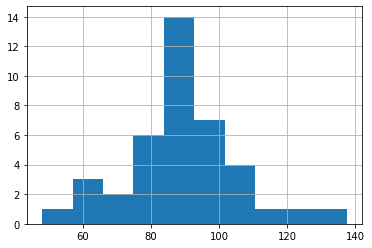

In [19]:
office_1 = pd.Series(stats.norm(90, 15).rvs(40))
office_1.hist()

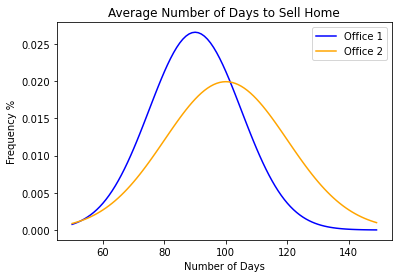

In [10]:
# Borrowed code - I need to analyze how to do this myself

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('Frequency %')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

Set Hypothesis:

H0: Average sell time for office # 1 == to Average sell time for office # 2

HA: Average sell time for office # 1 != Average sell time for office # 2

Set alpha: 

In [12]:
alpha = .05

Assumptions:

### Independent: Yes
### Normal distribution: Yes, we presume normality based on graph curation and sample sizes.
### Variance: No, not equal. 

In [23]:
off_1_var = 15 ** 2 
off_2_var = 20 ** 2
[off_1_var, 
off_2_var]

[225, 400]

In [74]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False, alternative='two-sided')

print(f't:{t}, p:{p}, alpha:{alpha}')

if t != 0 and p < alpha:
    print('Reject null')
else: 
    print('Do not reject null')

t:-2.7091418459143854, p:0.00811206270346016, alpha:0.05
Reject null


The t value is < 0 and the p-value is less than alpha. From this, the p-value, we can reject our null hypothesis and state that the Average sell time for office # 1 and the average sell time for office # 2 are not equal. 

In [32]:
# a > b - t value outcome is to what degree the truth of this statement is
# negative implies that a is actually < b, positive implies that a is in fact > b, in actuality it tells you 
# which 'tail' is being used

2. Load the mpg dataset and use it to answer the following questions:
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [34]:
from pydataset import data
mpg = data('mpg') 

In [60]:
# mpg.info()

mpg['average_mileage'] = mpg[['cty', 'hwy']].mean(axis=1)
fuel_eff_2008 = mpg[mpg.year == 2008].average_mileage
fuel_eff_1999 = mpg[mpg.year == 1999].average_mileage

<AxesSubplot:>

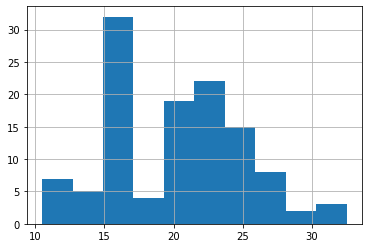

In [65]:
fuel_eff_2008.hist()

<AxesSubplot:>

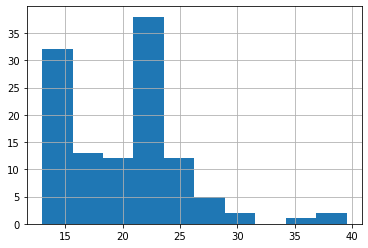

In [66]:
fuel_eff_1999.hist()

In [67]:
# H0: Fuel-efficiency for cars from 2008 == Fuel-efficiency for cars from 1999
# HA: Fuel-efficiency for cars from 2009 != Fuel-efficiency for cars from 1999

In [61]:
alpha = .05

In [69]:
v_08 = fuel_eff_2008.var()
v_99 = fuel_eff_1999.var()
v_08, v_99

(24.097480106100797, 27.122605363984682)

In [71]:
# Assumptions:
# Independent: Yes
# Normal distribution: Yes, based on sample size and graph curation. 
# Variance: No, they are not the same variance.

In [73]:
t, p = stats.ttest_ind(fuel_eff_2008, fuel_eff_1999 , equal_var=False)

print(f't:{t}, p:{p}, alpha:{alpha}')

if t != 0 and p < alpha:
    print('Reject null')
else: 
    print('Do not reject null')

t:-0.21960177245940962, p:0.8263750772060638, alpha:0.05
Do not reject null


In [81]:
# Based on the p-value being greater than the alpha, we fail to reject the null hypothesis.

Are compact cars more fuel-efficient than the average car?

In [87]:
mpg.head()
fuel_eff_compact = mpg[mpg['class'] == 'compact'].average_mileage
avg_car_eff = mpg.average_mileage.mean()
avg_car_eff

20.14957264957265

<AxesSubplot:>

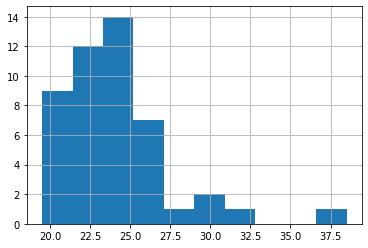

In [88]:
fuel_eff_compact.hist()

In [89]:
# H0: Compact car fuel-efficiency == fuel-efficiency of average car
# HA: Compact car fuel-efficiency > fuel-efficiency of average car

In [90]:
alpha = .05

In [91]:
avg_car_v = mpg.average_mileage.var()
compact_v = fuel_eff_compact.var()
avg_car_v, compact_v

(25.50542900113715, 12.442876965772433)

In [98]:
# Assumptions:
# Independent: Yes
# Normal distribution: Yes, based on sample size and graph curation. 
# Variance: No, they are not the same variance.

In [101]:
t, p = stats.ttest_1samp(fuel_eff_compact, avg_car_eff, alternative='greater')

print(f't:{t}, p:{p}, alpha:{alpha}')

if t > 0 and p < alpha:
    print('Reject null')
else: 
    print('Do not reject null')

t:7.896888573132535, p:2.0992818971585668e-10, alpha:0.05
Reject null


In [99]:
# Based on the t being greater than 0 and the p-value being below the alpha, we can reject the null hypothesis. The compact car fuel-efficiency 
# is greater than fuel-efficiency of average car.

Do manual cars get better gas mileage than automatic cars?

In [122]:
mpg['is_automatic'] = mpg.trans.str.contains('auto')

fuel_eff_auto = mpg[mpg.is_automatic == True].average_mileage
fuel_eff_man = mpg[mpg.is_automatic == False].average_mileage

<AxesSubplot:>

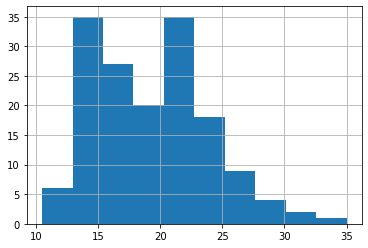

In [119]:
fuel_eff_auto.hist()

<AxesSubplot:>

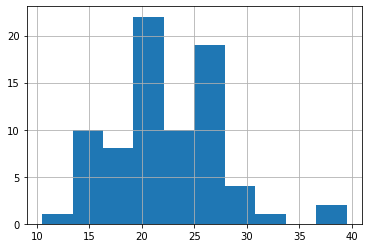

In [120]:
fuel_eff_man.hist()

In [121]:
# H0: Manual car fuel-efficiency == Auto car fuel-efficiency
# HA: Manual car fuel-efficiency > Auto car fuel-efficiency

In [123]:
alpha = .05

In [125]:
man_v = fuel_eff_man.var()
auto_v = fuel_eff_auto.var()
man_v, auto_v

(26.635167464114826, 21.942777233382337)

In [126]:
# Assumptions:
# Independent: Yes
# Normal distribution: Yes, based on sample size and graph curation. 
# Variance: No, they are not the same variance.

In [128]:
t, p = stats.ttest_ind(fuel_eff_man,fuel_eff_auto , equal_var=False, alternative='greater')

print(f't:{t}, p:{p}, alpha:{alpha}')

if t > 0 and p < alpha:
    print('Reject null')
else: 
    print('Do not reject null')

t:4.443514012903071, p:8.976124499958965e-06, alpha:0.05
Reject null


In [129]:
# Based on the t being greater than 0 and the p-value being less than alpha we can reject the null hypothesis.
# Thus, the manual car fuel-efficiency is greater than the auto car fuel-efficiency.